In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('/content/drive/MyDrive/ecodrive/EcoDrive.xlsx')

In [5]:
df = pd.DataFrame(data)

#**EcoDrive Motors Analysis**

In [6]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Unnamed: 17
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10,1
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,2
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10,4
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         50000 non-null  object 
 1   County                                             49999 non-null  object 
 2   City                                               49999 non-null  object 
 3   State                                              50000 non-null  object 
 4   Postal Code                                        49999 non-null  float64
 5   Model Year                                         50000 non-null  int64  
 6   Make                                               50000 non-null  object 
 7   Model                                              50000 non-null  object 
 8   Electric Vehicle Type                              50000 non-null  object 
 9   Clean 

In [8]:
#check if there is and how many null values are there in each column
df.isnull().sum()

,0
VIN (1-10),0
County,1
City,1
State,0
Postal Code,1
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [9]:
#deleting an unnamed column
df.drop('Unnamed: 17', axis=1, inplace=True)

In [10]:
#updated dataframe
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [11]:
#checking the stats of the data and observe if there is any outlier
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,49999.000000,50000.000000,50000.000000,50000.000000,49996.000000,5.000000e+04,4.999900e+04
mean,98178.954379,2020.881480,54.425580,956.748400,31.644232,2.252927e+08,5.303193e+10
std,536.469158,2.931335,89.411085,7794.677314,14.757783,7.333246e+07,2.792178e+08
min,20814.000000,2000.000000,0.000000,0.000000,1.000000,4.469000e+03,6.041111e+09
25%,98034.000000,2019.000000,0.000000,0.000000,18.000000,1.899449e+08,5.303301e+10
50%,98109.000000,2022.000000,0.000000,0.000000,36.000000,2.352380e+08,5.303302e+10
75%,98188.000000,2023.000000,53.000000,0.000000,45.000000,2.598397e+08,5.303303e+10
max,99403.000000,2025.000000,337.000000,184400.000000,49.000000,4.789259e+08,5.307794e+10


**NO OUTLIER IS SEEN**

In [12]:
#checking the stats of string data
df[['VIN (1-10)', 'County', 'City','State','Make','Model','Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']].describe()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,50000,49999,49999,50000,50000,50000,50000,50000,49998,49999
unique,8097,39,266,4,39,141,2,3,358,64
top,7SAYGDEE7P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.271716 47.452837),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,335,36500,9509,49996,22452,10582,39267,27128,2374,24995


In [13]:
# Check for duplicates across all columns
duplicates = df[df.duplicated()]

In [14]:
# Print the number of duplicates
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


**NO DUPLICATE VALUES**

#**DATA   ANALYSIS**
##**Basic Level questions**

###***Q1.  What is the total number of electric vehicles registered in each county?***

In [15]:
# Group by county and count electric vehicles
ev_counts_by_county = df.groupby('County')['Electric Vehicle Type'].count()

# Display the results
print("Total number of electric vehicles registered in each county:")
print(ev_counts_by_county)

Total number of electric vehicles registered in each county:
County
Adams               4
Asotin              5
Benton             48
Chelan             35
Clallam            77
Clark            4687
Columbia            2
Cowlitz           437
Douglas            17
Ferry               2
Franklin            5
Grant              13
Grays Harbor       24
Island            205
Jefferson         367
King            36500
Kitsap           2177
Kittitas           18
Klickitat          22
Lewis              12
Marin               1
Mason              29
Montgomery          2
Okanogan            9
Pacific             5
Pend Oreille        1
Pierce            261
San Juan           27
Skagit             50
Skamania            7
Snohomish        2881
Spokane            90
Stevens            30
Thurston         1498
Wahkiakum           5
Walla Walla        17
Whatcom           100
Whitman            11
Yakima            318
Name: Electric Vehicle Type, dtype: int64


###***Q2. which are the top 5 most popular electric vehicle models in the dataset***

In [16]:
# Group by model and count occurrences
model_counts = df.groupby('Model')['Model'].count().sort_values(ascending=False)

# Get the top 5 models
top_5_models = model_counts.head(5)

# Display the results
print("Top 5 most popular electric vehicle models:")
print(top_5_models)

Top 5 most popular electric vehicle models:
Model
MODEL Y    10582
MODEL 3     8171
LEAF        3424
MODEL S     1939
MODEL X     1693
Name: Model, dtype: int64


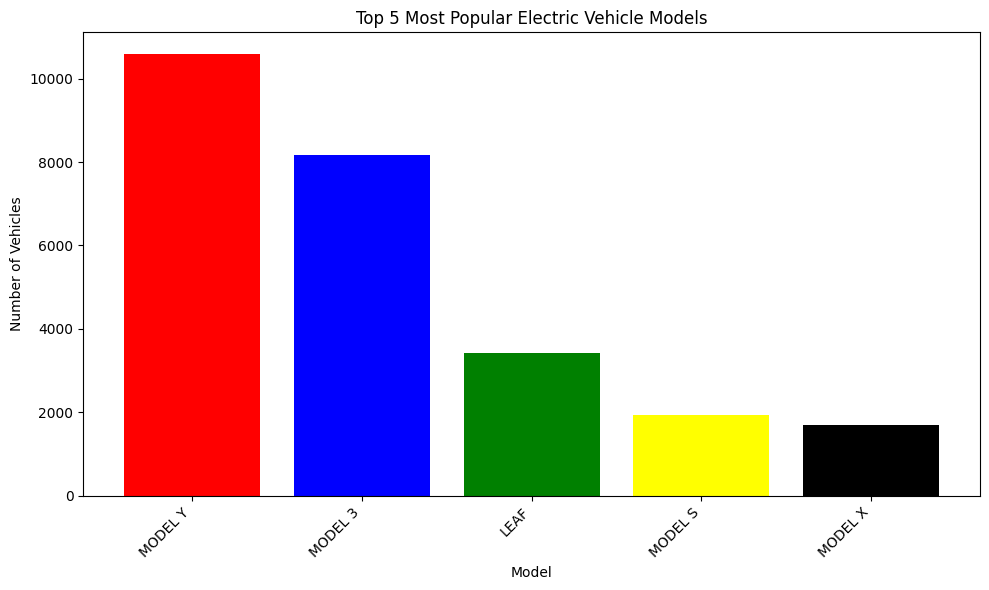

In [27]:
# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(top_5_models.index, top_5_models.values, color=['red', 'blue', 'green', 'yellow', 'black'])
plt.xlabel("Model")
plt.ylabel("Number of Vehicles")
plt.title("Top 5 Most Popular Electric Vehicle Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###***Q3. What is the average electric range of vehicles by type(BEV vs PHEV)?***

In [17]:
# Calculate average range for BEV and PHEV
average_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].mean()

# Display the results
print("Average electric range by vehicle type:")
print(average_range_by_type)

Average electric range by vehicle type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            60.935620
Plug-in Hybrid Electric Vehicle (PHEV)    30.608404
Name: Electric Range, dtype: float64


###***Q4.  How many vehicles are eligible for clean alternative fuel vehicle incentives?***

In [20]:
# Filter for 'Clean Alternative Fuel Vehicle Eligible'
eligible_vehicles = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']

# Get the count of eligible vehicles
eligible_count = eligible_vehicles.shape[0]

# Display the count
print(f"Number of Clean Alternative Fuel Vehicle Eligible vehicles: {eligible_count}")

Number of Clean Alternative Fuel Vehicle Eligible vehicles: 17615


###***Q5. what is the distribution of electric vehicles by model year?***

In [21]:

model_year_distribution = df['Model Year'].value_counts().sort_index()

# Display the distribution
print("Distribution of electric vehicles by model year:")
print(model_year_distribution)

Distribution of electric vehicles by model year:
Model Year
2000        3
2008        6
2010        7
2011      186
2012      334
2013     1039
2014      825
2015     1120
2016     1374
2017     2080
2018     3796
2019     2706
2020     3080
2021     4965
2022     7115
2023    16183
2024     5170
2025       11
Name: count, dtype: int64


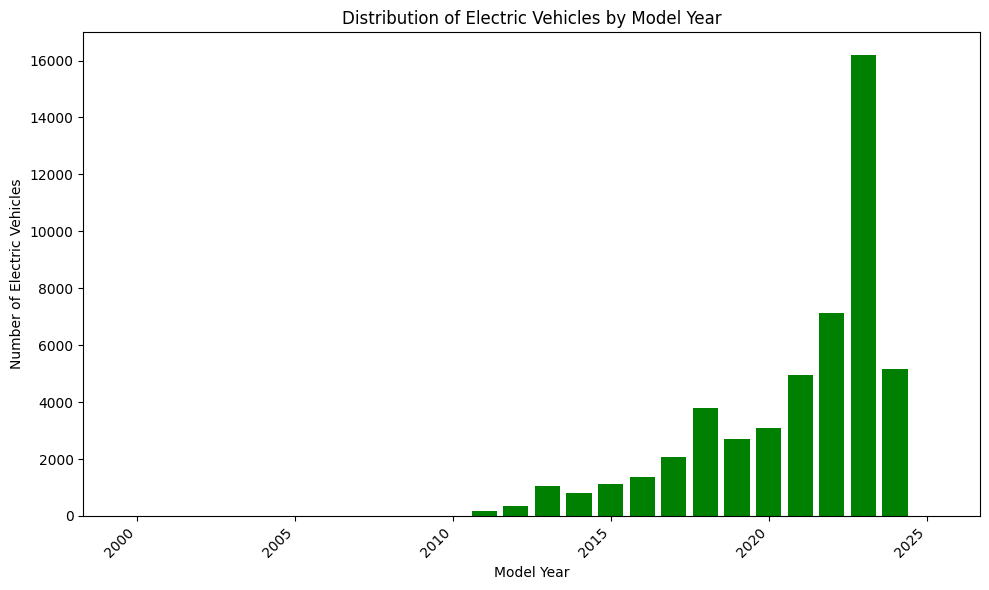

In [26]:
# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(model_year_distribution.index, model_year_distribution.values,color = 'green')
plt.xlabel("Model Year")
plt.ylabel("Number of Electric Vehicles")
plt.title("Distribution of Electric Vehicles by Model Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###***Q6. Which cities have the highest number of registered electric vehicles?***

In [28]:
# Group by city and count electric vehicles
city_counts = df.groupby('City')['City'].count().sort_values(ascending=False)

# Get the cities with the highest counts
top_cities = city_counts.head(10)  # Change 10 to the desired number of top cities

# Display the results
print("Cities with the highest number of registered electric vehicles:")
print(top_cities)

Cities with the highest number of registered electric vehicles:
City
Seattle      9509
Bellevue     4666
Vancouver    2965
Kirkland     2917
Sammamish    2401
Tukwila      2391
Redmond      2277
Bothell      1749
Renton       1485
Kent         1341
Name: City, dtype: int64


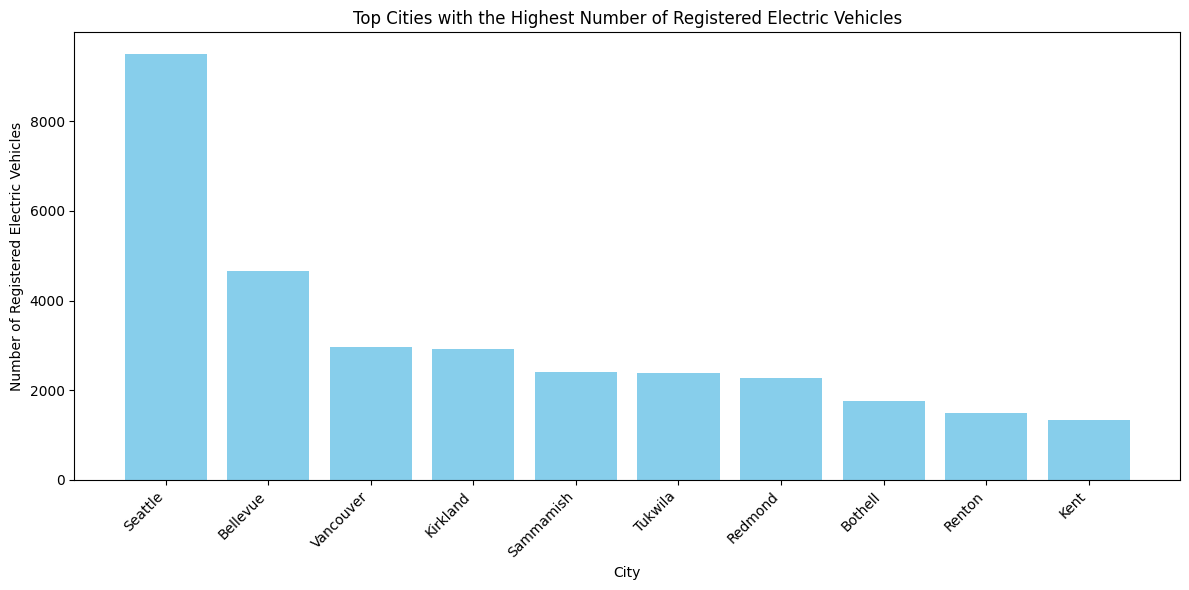

In [29]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_cities.index, top_cities.values, color='skyblue')
plt.xlabel("City")
plt.ylabel("Number of Registered Electric Vehicles")
plt.title("Top Cities with the Highest Number of Registered Electric Vehicles")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###***Q7. What is the relationship between base MSRP and electric range?***

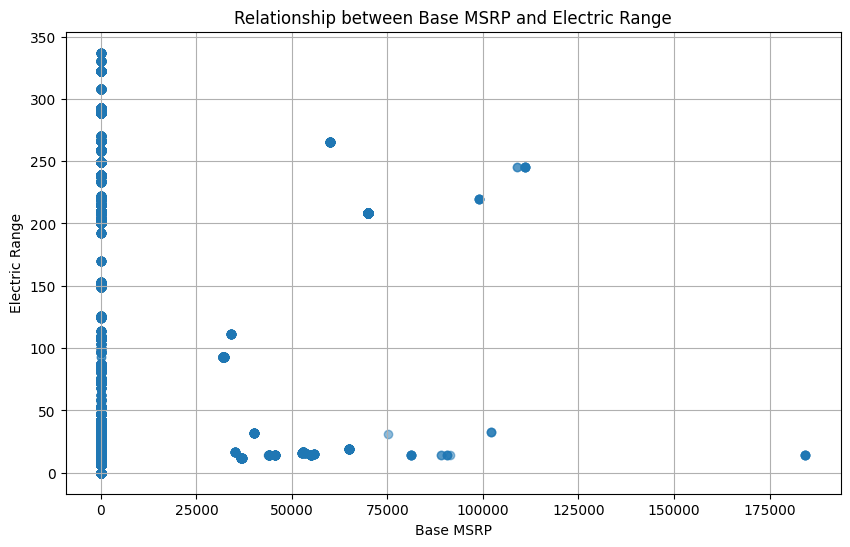

In [30]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(df['Base MSRP'], df['Electric Range'], alpha=0.5)  # Alpha for transparency
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.title("Relationship between Base MSRP and Electric Range")
plt.grid(True)  # Add a grid for better readability
plt.show()

###***Q8. Which electric utility providers serve the most electric vehicles?***

In [32]:
# Group by electric utility and count vehicles
utility_counts = df.groupby('Electric Utility')['Electric Utility'].count().sort_values(ascending=False)

# Get the top utility providers
top_utilities = utility_counts.head(5)  # Change 10 to the desired number of top utilities

# Display the results
print("Electric utility providers serving the most electric vehicles:")
print(top_utilities)

Electric utility providers serving the most electric vehicles:
Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                       24995
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                        11557
PUGET SOUND ENERGY INC                                               6621
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)     4588
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY           437
Name: Electric Utility, dtype: int64


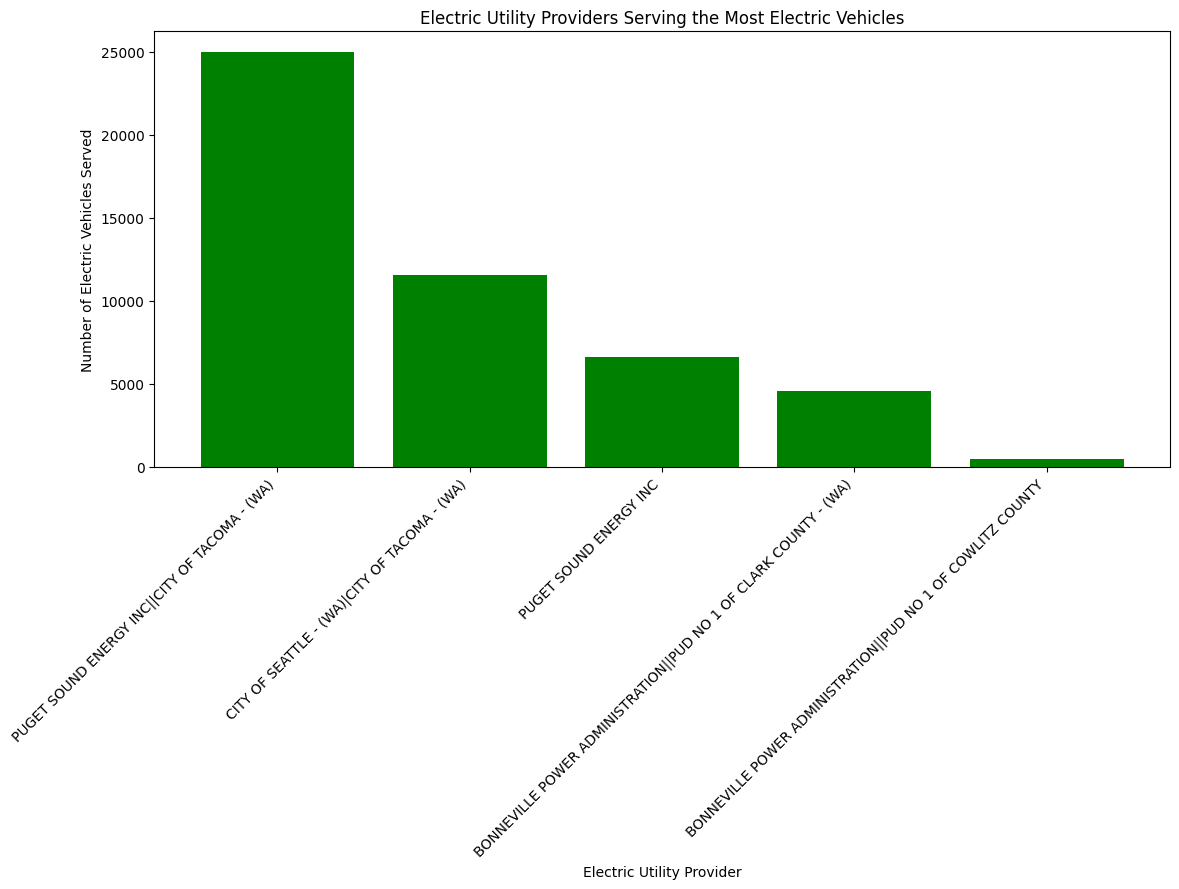

In [35]:
# Creating a bar chart
plt.figure(figsize=(12, 9))
plt.bar(top_utilities.index, top_utilities.values, color='green')
plt.xlabel("Electric Utility Provider")
plt.ylabel("Number of Electric Vehicles Served")
plt.title("Electric Utility Providers Serving the Most Electric Vehicles")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###***Q9 What percentage of vehicles are plug-in hybrid electric vehicles(PHEVs)***

In [43]:
phev_percentage = (df['Electric Vehicle Type'].value_counts(normalize=True)['Plug-in Hybrid Electric Vehicle (PHEV)']) * 100

# Display the result
print(f"Percentage of vehicles that are PHEVs: {phev_percentage:.2f}%")

Percentage of vehicles that are PHEVs: 21.47%


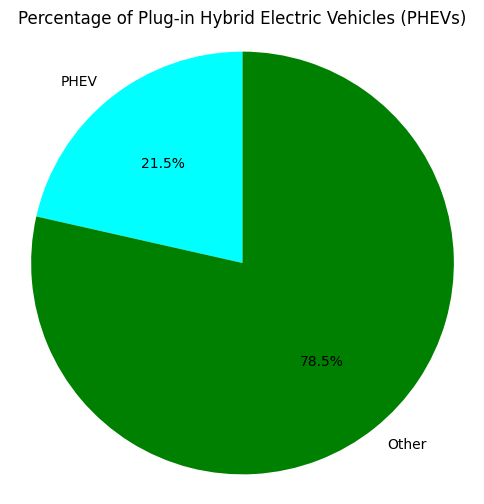

In [46]:
other_percentage = 100 - phev_percentage
# Create labels and data for the pie chart
labels = ['PHEV', 'Other']
sizes = [phev_percentage, other_percentage]
colors = ['aqua', 'green']  # Specify colors for PHEV and Other

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Plug-in Hybrid Electric Vehicles (PHEVs)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###***Q10. Which legislative districts have the highest EV Adoption rates?***

In [50]:
# 1. Group by Legislative District and count EVs
ev_counts_by_district = df.groupby('Legislative District')['Electric Vehicle Type'].count()

# 2. Group by Legislative District and count unique VINs (1-10) for total vehicles
total_vehicles_by_district = df.groupby('Legislative District')['VIN (1-10)'].nunique()

# 3. Calculate EV Adoption Rate per District
ev_adoption_rate = (ev_counts_by_district / total_vehicles_by_district) * 100

# 4. Sort by Adoption Rate (Descending)
sorted_districts = ev_adoption_rate.sort_values(ascending=False)

# 5. Get Top Districts (e.g., Top 10)
top_districts = sorted_districts.head(10)

# 6. Display Results
print("Legislative Districts with Highest EV Adoption Rates (using VIN):")
print(top_districts)

Legislative Districts with Highest EV Adoption Rates (using VIN):
Legislative District
11.0    331.165541
41.0    221.877979
45.0    210.531178
48.0    208.904110
1.0     173.524721
33.0    170.287540
5.0     165.096154
47.0    160.326609
36.0    156.779122
46.0    156.306578
dtype: float64


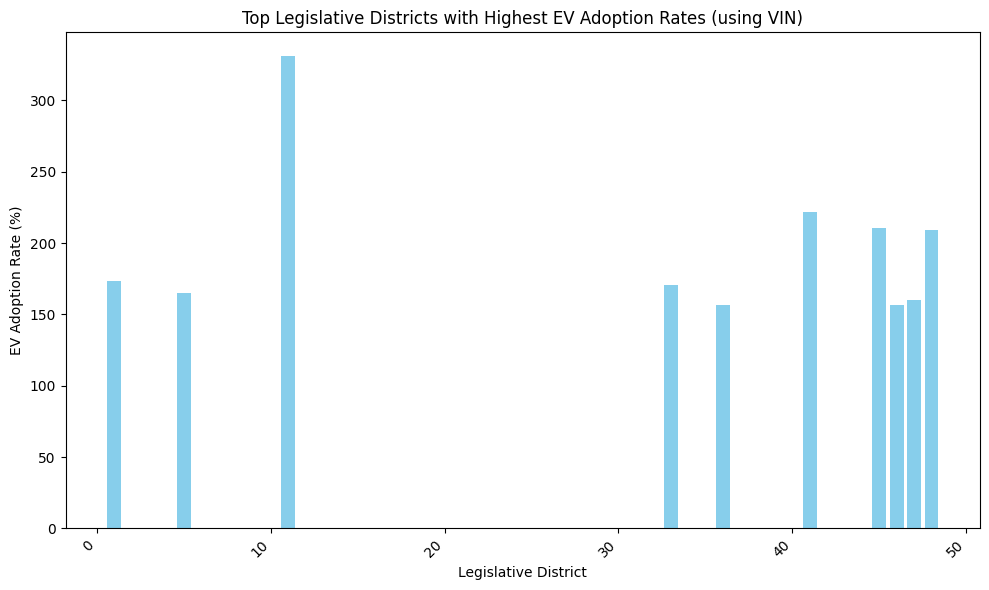

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(top_districts.index, top_districts.values, color='skyblue')
plt.xlabel("Legislative District")
plt.ylabel("EV Adoption Rate (%)")
plt.title("Top Legislative Districts with Highest EV Adoption Rates (using VIN)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##**Medium Level Questions**

###***Q1 What is the average base MSRP for elctric vehicles in different counties?***

In [60]:
# Group by county and calculate the average base MSRP
average_msrp_by_county = df.groupby('County')['Base MSRP'].mean()

# Display the results
print("Average Base MSRP for Electric Vehicles in Different Counties:")
print(average_msrp_by_county)

Average Base MSRP for Electric Vehicles in Different Counties:
County
Adams              0.000000
Asotin          6390.000000
Benton          1456.250000
Chelan          4542.857143
Clallam            0.000000
Clark            959.285257
Columbia           0.000000
Cowlitz         1023.684211
Douglas         2058.529412
Ferry              0.000000
Franklin           0.000000
Grant              0.000000
Grays Harbor       0.000000
Island          1255.609756
Jefferson          0.000000
King             975.220274
Kitsap          1153.987138
Kittitas           0.000000
Klickitat       3177.272727
Lewis              0.000000
Marin              0.000000
Mason           1272.413793
Montgomery         0.000000
Okanogan           0.000000
Pacific         6450.000000
Pend Oreille       0.000000
Pierce           802.107280
San Juan        1183.333333
Skagit           736.000000
Skamania           0.000000
Snohomish        719.522735
Spokane            0.000000
Stevens            0.000000
Thurst

###***Q2 Which vehicle models have the highest and lowest electric ranges?***

In [61]:
# Group by model and get the maximum and minimum electric ranges
model_ranges = df.groupby('Model')['Electric Range'].agg(['max', 'min'])

# Find the models with the highest and lowest ranges
highest_range_model = model_ranges['max'].idxmax()
lowest_range_model = model_ranges['min'].idxmin()

# Display the results
print(f"Model with highest electric range: {highest_range_model} ({model_ranges.loc[highest_range_model, 'max']})")
print(f"Model with lowest electric range: {lowest_range_model} ({model_ranges.loc[lowest_range_model, 'min']})")

Model with highest electric range: MODEL S (337)
Model with lowest electric range: AIR (0)


###***Q3 How does the distribution of electric vehicle types vary across different cities?***

In [65]:
# Create a cross-tabulation (contingency table) of vehicle types and cities
city_type_distribution = pd.crosstab(df['City'], df['Electric Vehicle Type'])

# Display the distribution table
print("Distribution of Electric Vehicle Types by City:")
print(city_type_distribution)



Distribution of Electric Vehicle Types by City:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
City                                                    
Aberdeen                                            4   
Algona                                             13   
Allyn                                               1   
Amboy                                               8   
Anacortes                                          11   
...                                               ...   
Yacolt                                             14   
Yakima                                            150   
Yarrow Point                                        7   
Yelm                                               99   
Zillah                                             12   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
City                                                           
Aberdeen                                                    1  
Algona            

###***Q4 What are the top 5 electric vehicle models with the highest base MSRP***

In [66]:


# Sort by Base MSRP in descending order and get the top 5
top_5_msrp_models = df.sort_values(by=['Base MSRP'], ascending=False).head(5)[['Model', 'Base MSRP']]

# Display the results
print("Top 5 Electric Vehicle Models with Highest Base MSRP:")
print(top_5_msrp_models)

Top 5 Electric Vehicle Models with Highest Base MSRP:
          Model  Base MSRP
24900  PANAMERA     184400
552    PANAMERA     184400
39524  PANAMERA     184400
12783  PANAMERA     184400
736    PANAMERA     184400


###***Q5 What is the trend of electric vehicle registration over the past 5 years?***

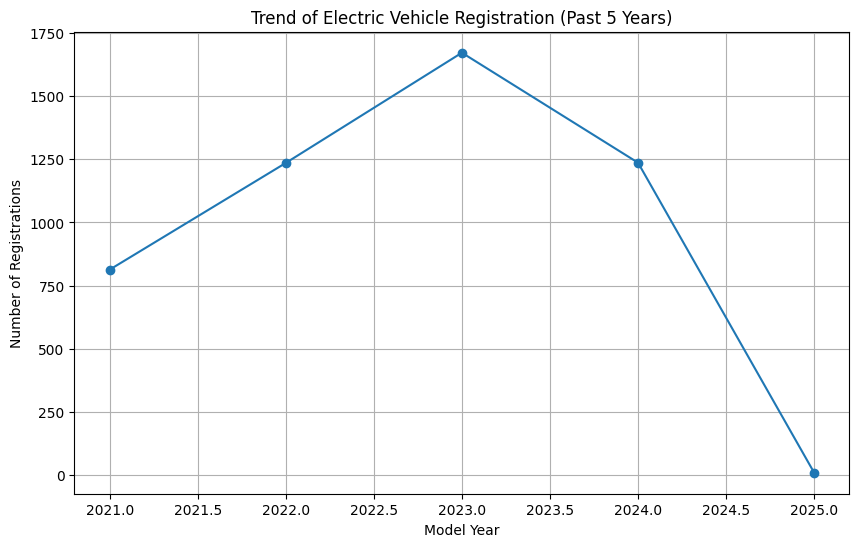

In [69]:
# Filter data for the past 5 years
recent_years = df[df['Model Year'].isin(range(df['Model Year'].max() - 4, df['Model Year'].max() + 1))]

# Group by Model Year and count registrations
registration_trend = recent_years.groupby('Model Year')['VIN (1-10)'].nunique()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(registration_trend.index, registration_trend.values, marker='o', linestyle='-')
plt.xlabel("Model Year")
plt.ylabel("Number of Registrations")
plt.title("Trend of Electric Vehicle Registration (Past 5 Years)")
plt.grid(True)
plt.show()

###***Q6. Which legislative districts have the highest growth in EV adoption over the past 5 years***

In [70]:
# Filter data for the past 5 years
recent_years = df[df['Model Year'].isin(range(df['Model Year'].max() - 4, df['Model Year'].max() + 1))]

# Group by Legislative District and Model Year, then count unique VINs
ev_counts_by_district_year = recent_years.groupby(['Legislative District', 'Model Year'])['VIN (1-10)'].nunique()

# Calculate EV adoption growth for each district
ev_adoption_growth = ev_counts_by_district_year.groupby('Legislative District').pct_change()

# Get the average growth rate over the past 5 years for each district
average_growth_by_district = ev_adoption_growth.groupby('Legislative District').mean()

# Sort by average growth rate (descending)
sorted_districts = average_growth_by_district.sort_values(ascending=False)

# Get the top districts (e.g., top 10)
top_districts = sorted_districts.head(10)

# Display the results
print("Legislative Districts with Highest EV Adoption Growth (Past 5 Years):")
print(top_districts)

Legislative Districts with Highest EV Adoption Growth (Past 5 Years):
Legislative District
25.0    1.300000
13.0    1.057576
29.0    1.041667
42.0    0.661765
4.0     0.585859
9.0     0.555556
3.0     0.547619
11.0    0.533970
38.0    0.532407
21.0    0.408838
Name: VIN (1-10), dtype: float64


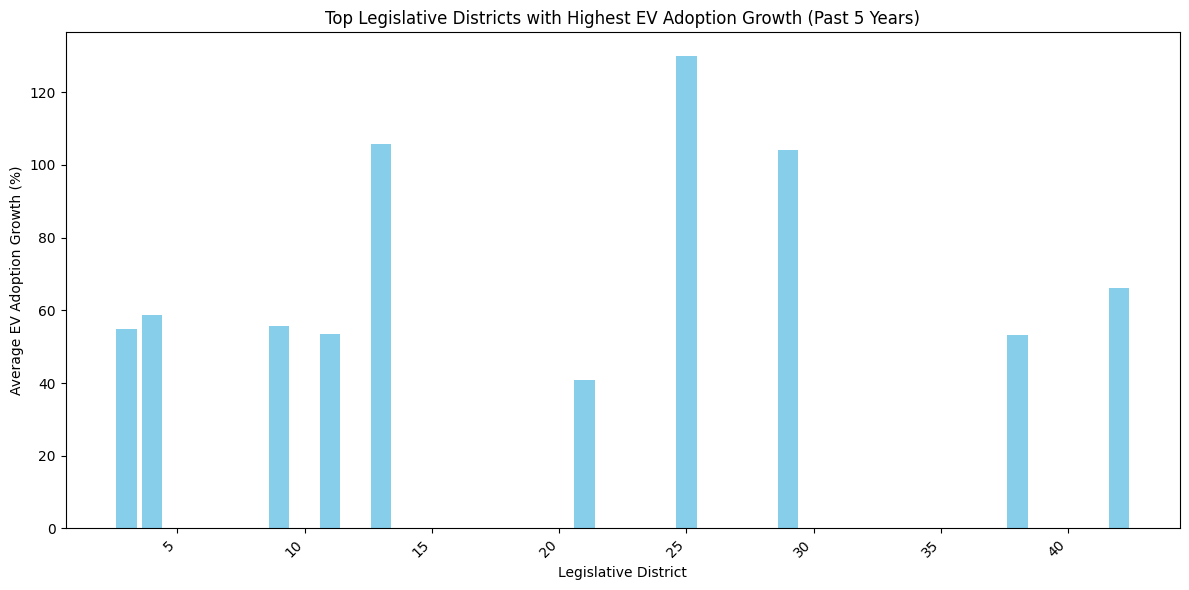

In [71]:
# Create a bar chart to visualize the growth
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_districts.index, top_districts.values * 100, color='skyblue')  # Multiply by 100 for percentage
plt.xlabel("Legislative District")
plt.ylabel("Average EV Adoption Growth (%)")
plt.title("Top Legislative Districts with Highest EV Adoption Growth (Past 5 Years)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()